In [1]:
from pynq import Overlay
from pynq import MMIO

ol = Overlay("./design_1_wrapper.bit") # designate a bitstream to be flashed to the FPGA
ol.download() # flash the FPGA

with open("input.dat", "r") as file:
    # Read the lines from the file and convert them to integers
    input = [int(line.strip()) for line in file]

mul_ip = MMIO(0x40000000, 0x10000) # (IP_BASE_ADDRESS, ADDRESS_RANGE), told to us in Vivado
output=[]
for i in input:
    inp = ((i - 2**31)% 2**32 - 2**31)
    mul_ip.write(0x20, inp) # write input value to input address in fabric
    print("input:", (( mul_ip.read(0x20) - 2**31)% 2**32 - 2**31)) # confirm that our value was written correctly to the fabric
    mul_ip.write(0x00, 1) # set ap_start to 1 which initiates the process we wrote to the fabric
    print("output:", (( mul_ip.read(0x10) - 2**31)% 2**32 - 2**31)) # read corresponding output value from the output address of the fabric
    output.append((( mul_ip.read(0x10) - 2**31)% 2**32 - 2**31))

input: 100
output: 1000
input: -2
output: 1080
input: -100
output: 78
input: 13
output: -192
input: 97
output: 297
input: -36
output: -256
input: -86
output: -1179
input: 66
output: -651
input: 59
output: 56
input: -93
output: -624
input: -10
output: -895
input: 98
output: -127
input: -52
output: -410
input: -61
output: -906
input: 97
output: -212
input: -17
output: -357
input: -81
output: -934
input: 90
output: -190
input: -6
output: -355
input: -82
output: -984
input: 92
output: -113
input: -21
output: -435
input: -66
output: -985
input: 100
output: 9
input: -59
output: -643
input: -22
output: -824
input: 86
output: 46
input: -97
output: -942
input: 52
output: -447
input: 18
output: -219
input: -77
output: -1004
input: 100
output: -47
input: -81
output: -753
input: 32
output: -617
input: 25
output: -347
input: -72
output: -597
input: 97
output: 725
input: -97
output: 79
input: 75
output: 817
input: -40
output: 549
input: 0
output: 509
input: 37
output: 511
input: -66
output: 149
inpu

In [21]:
((100 - 2**31)% 2**32 - 2**31)

100

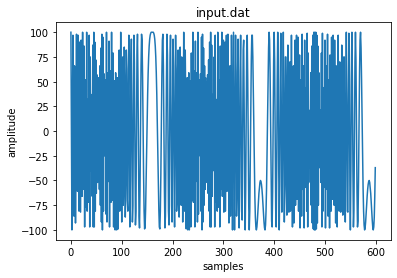

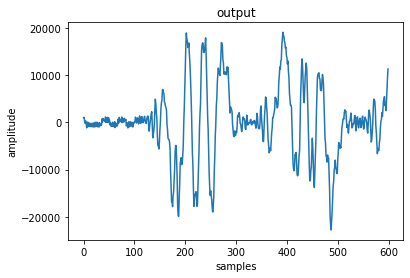

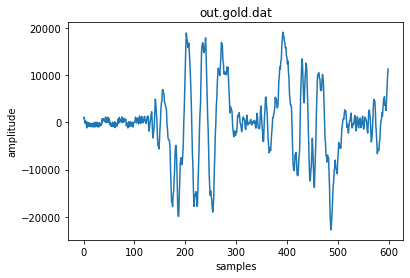

In [2]:
import matplotlib.pyplot as plt

plt.plot(input)

# Add labels and a title
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.title('input.dat')

# Show the plot (this displays the plot in a window)
plt.show()


plt.plot(output)

# Add labels and a title
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.title('output')

# Show the plot (this displays the plot in a window)
plt.show()


with open("out.gold.dat", "r") as file:
    # Read the lines from the file and convert them to integers
    outgold = [int(line.strip()) for line in file]

plt.plot(outgold)

# Add labels and a title
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.title('out.gold.dat')

# Show the plot (this displays the plot in a window)
plt.show()